## 导入模块

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## 读取数据集

In [2]:
data = pd.read_csv('winemag-data_first150k.csv',index_col='Unnamed: 0')

## 查看数据前五行

In [3]:
print(data.head())

  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN     

## 查看数据类型

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB
None


## 将根据数据类型 找到连续变量和离散变量

In [5]:
d_col = []
c_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        d_col.append(col)
    else:
        c_col.append(col)


## 连续变量

In [6]:
c_col

['points', 'price']

## 离散变量

In [7]:
d_col

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

## 对离散变量进行频数统计

In [8]:
for col in d_col:
    print('对离散变量{}进行频数分析：')
    print(data[col].value_counts())
    print('---------------------------------')

对离散变量{}进行频数分析：
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                  

## 对离散变量进行条形图分析

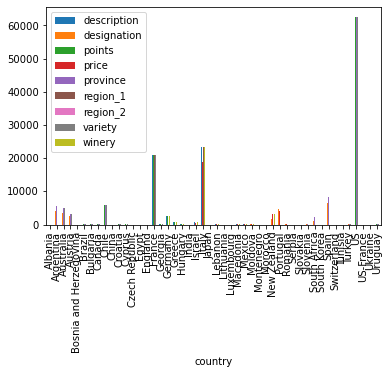

In [9]:
data.groupby('country').count().plot(kind='bar')

In [10]:
# data.groupby('description').count().plot(kind='bar')

In [11]:
# data.groupby('designation').count().plot(kind='bar')

In [12]:
# data.groupby('province').count().plot(kind='bar')

In [13]:
# data.groupby('region_1').count().plot(kind='bar')

In [14]:
# data.groupby('region_2').count().plot(kind='bar')

In [15]:
# data.groupby('variety').count().plot(kind='bar')

In [16]:
# data.groupby('winery').count().plot(kind='bar')

## 对连续变量进行描述性统计

In [17]:
data[c_col].describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## 对连续变量查看缺失值情况----price存在缺失值

In [18]:
1 - (data.describe().T["count"]) / len(data)

points    0.000000
price     0.090737
Name: count, dtype: float64

## 对连续型变量画直方图

points


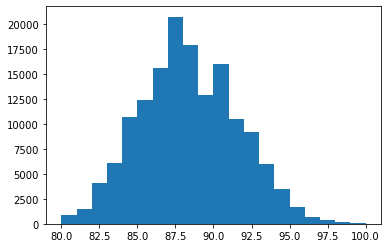

price


D:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


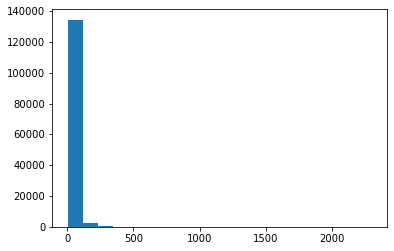

In [19]:
for i in c_col:
    print(i)
    plt.hist(data[i], bins=20)
    plt.show()

## 对连续型变量画箱线图

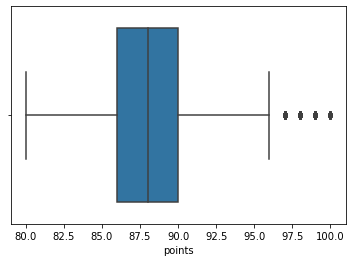

In [20]:
sns.boxplot(x='points',data=data)

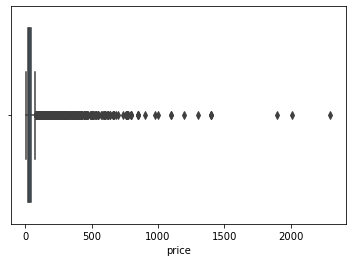

In [21]:
sns.boxplot(x='price',data=data)

## 对连续变量进行缺失值处理

## 第一种方法  删除缺失值

处理前

In [22]:
data['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

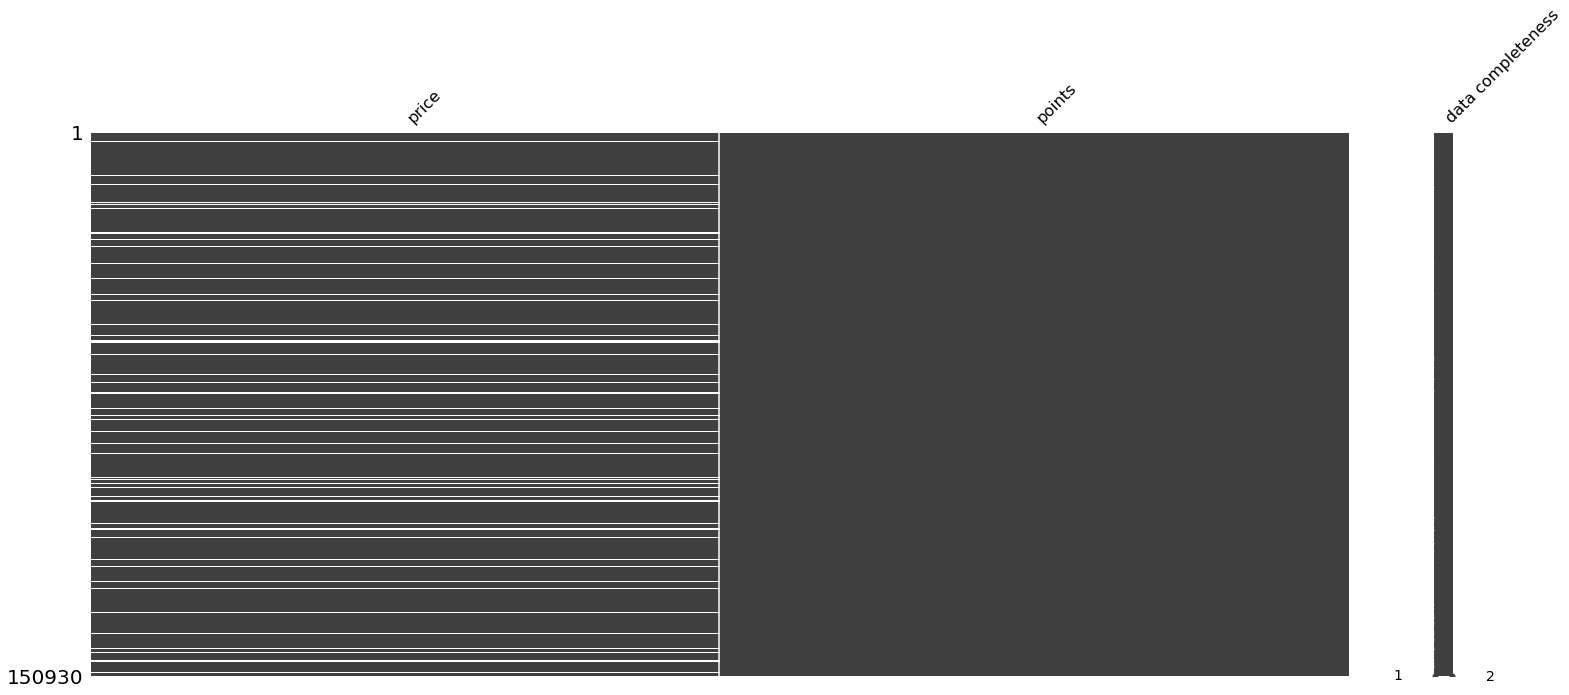

In [23]:
msno.matrix(data[['price','points']], labels=True)

处理后

In [24]:
data['price'] = data['price'].dropna()
df = data.loc[data['price'].notnull()][['price','points']]

In [25]:
df['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

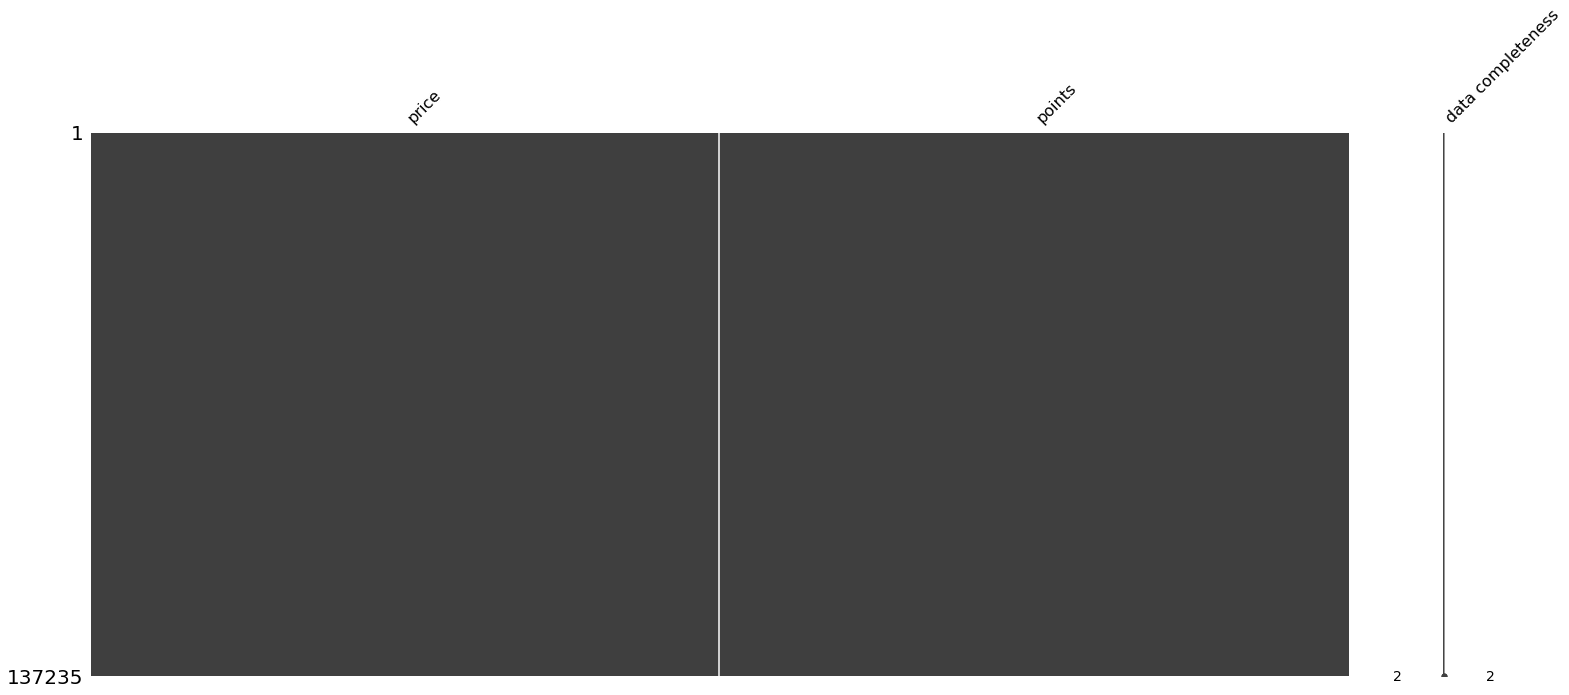

In [26]:
msno.matrix(df[['price','points']], labels=True)

## 第二种方法 使用众数填补缺失值

处理前

In [27]:
data['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

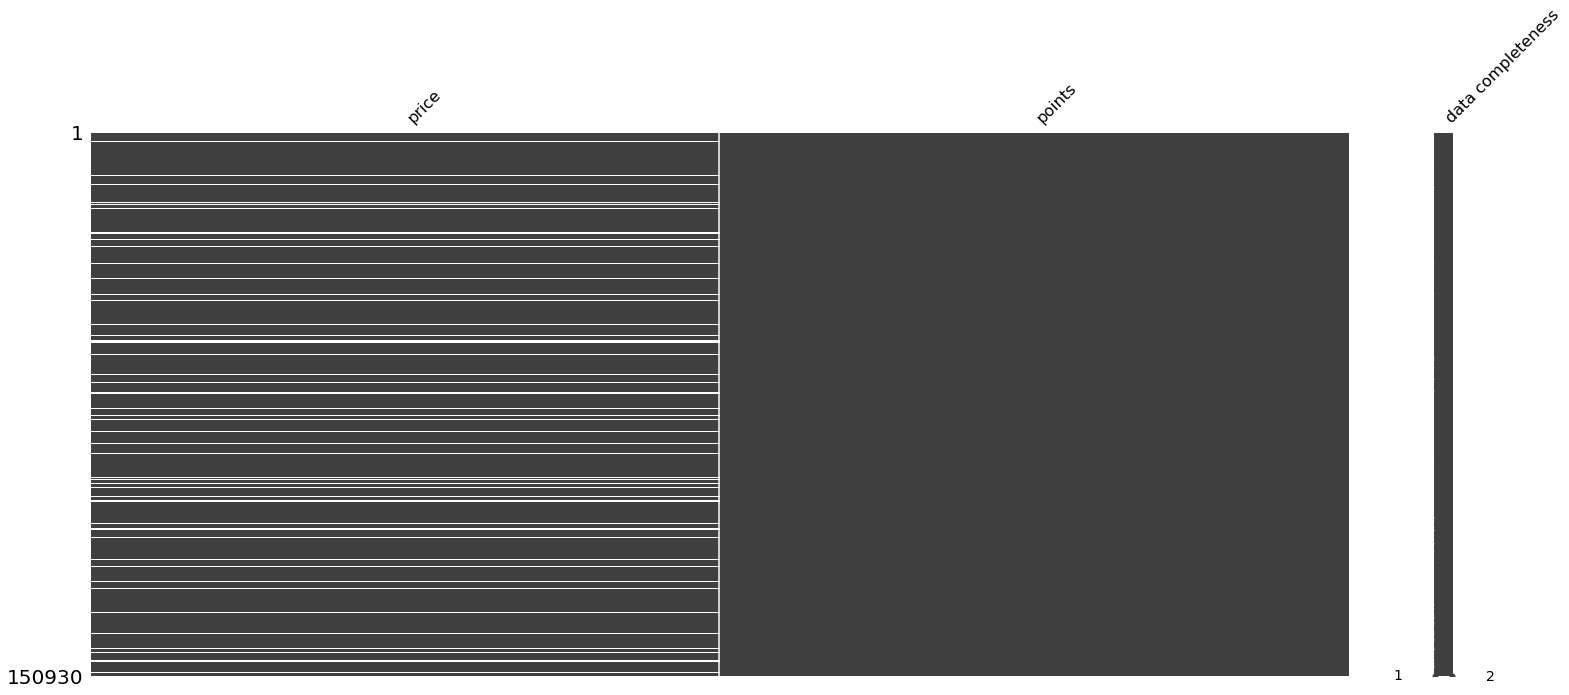

In [28]:
msno.matrix(data[['price','points']], labels=True)

处理后

In [29]:
mod = data['price'].mode()[0]
mod

20.0

In [30]:
data['price'] = data['price'].fillna(mod)
df = data.loc[data['price'].notnull()][['price','points']]

In [31]:
data['price'].describe()

count    150930.000000
mean         31.939966
std          34.840211
min           4.000000
25%          16.000000
50%          22.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64

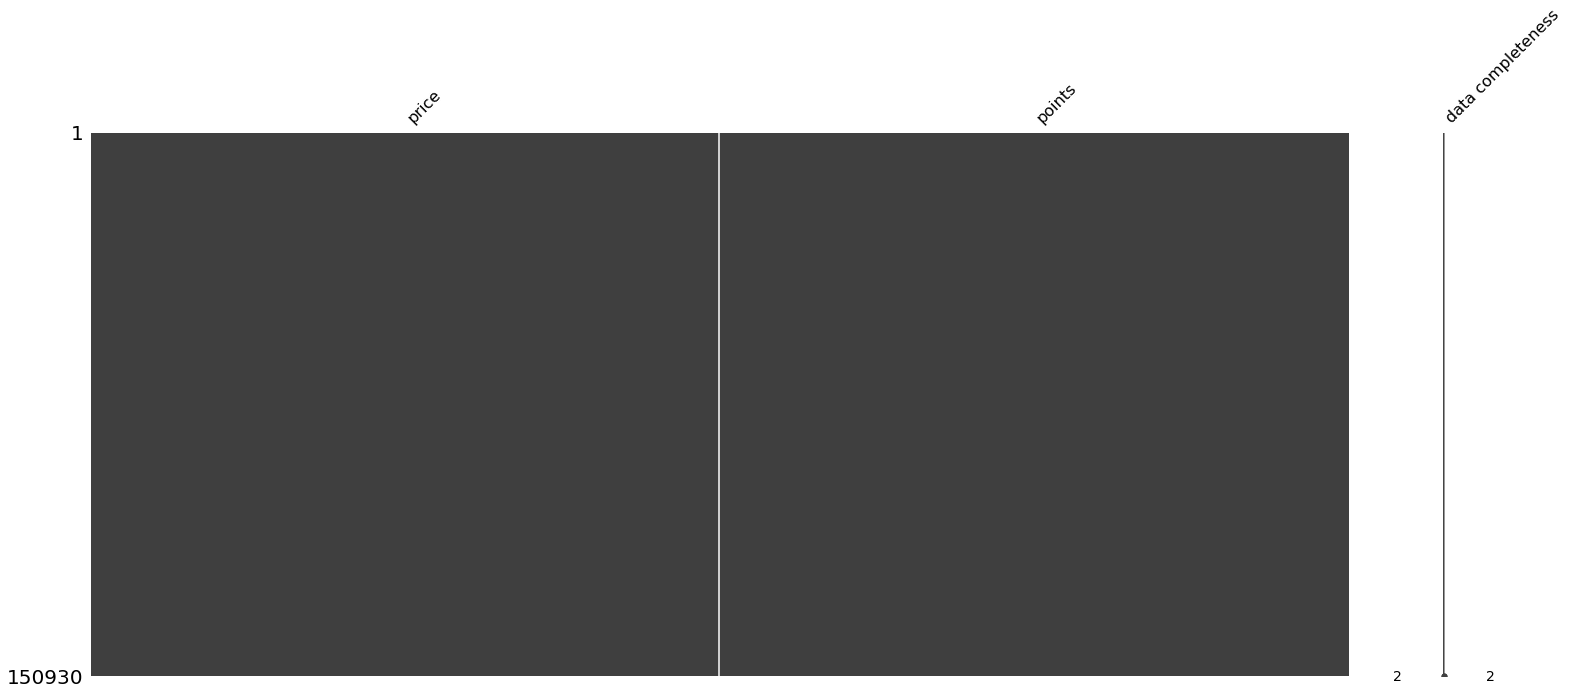

In [32]:
msno.matrix(df[['price','points']], labels=True)

## 第三种方法 使用属性的相关关系填补缺失值

属性之间相关性分析

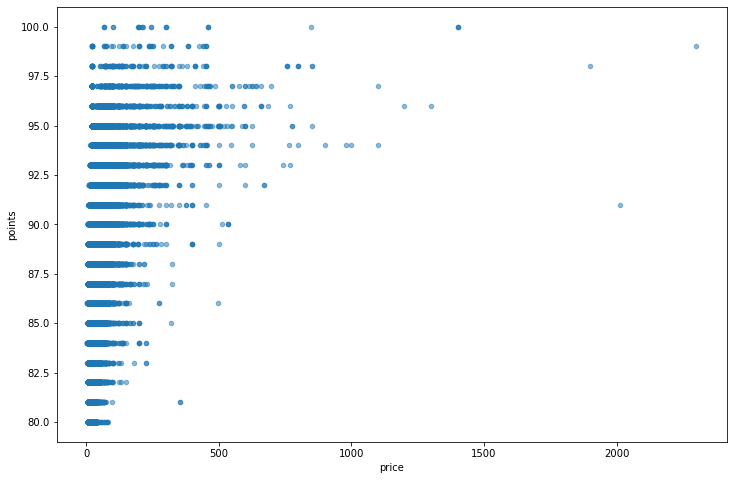

In [33]:
data.plot(kind="scatter",x="price",y="points",alpha=0.5,figsize=(12,8))

处理前

In [34]:
data = pd.read_csv('winemag-data_first150k.csv',index_col='Unnamed: 0')
data['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

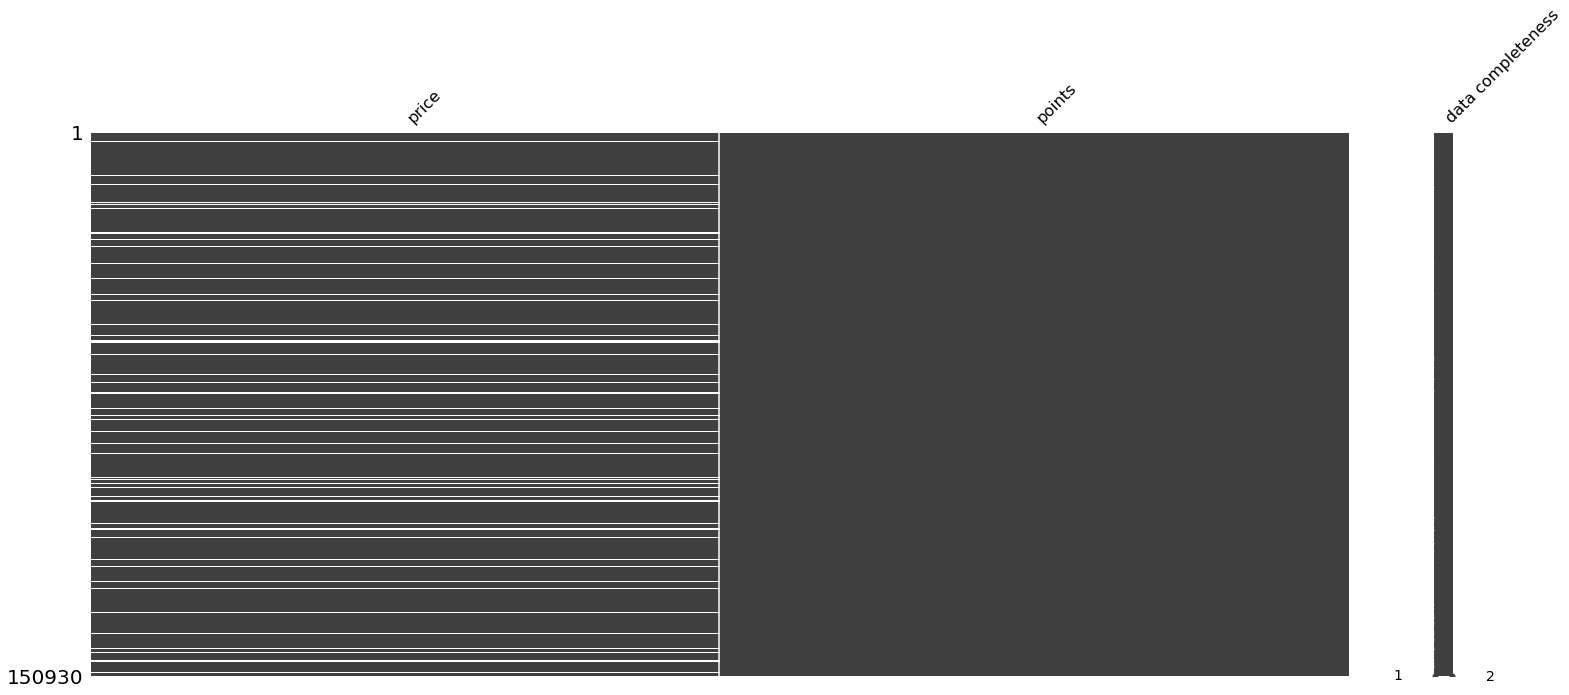

In [35]:
msno.matrix(data[['price','points']], labels=True)

处理后

In [36]:
data[['price','points']].head()

,price,points
0,235.0,96
1,110.0,96
2,90.0,96
3,65.0,96
4,66.0,95


In [37]:
notnulls = data[['price','points']].loc[data['price'].notnull(),'price']

In [38]:
isnulls = data[['price','points']].loc[data['price'].isnull(),'price']

In [39]:
len(isnulls)

13695

In [40]:
import random
data.loc[data['price'].isnull(),'price'] = random.sample(list(notnulls),13695)

In [41]:
data['price'].describe()

count    150930.000000
mean         33.086192
std          35.935378
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

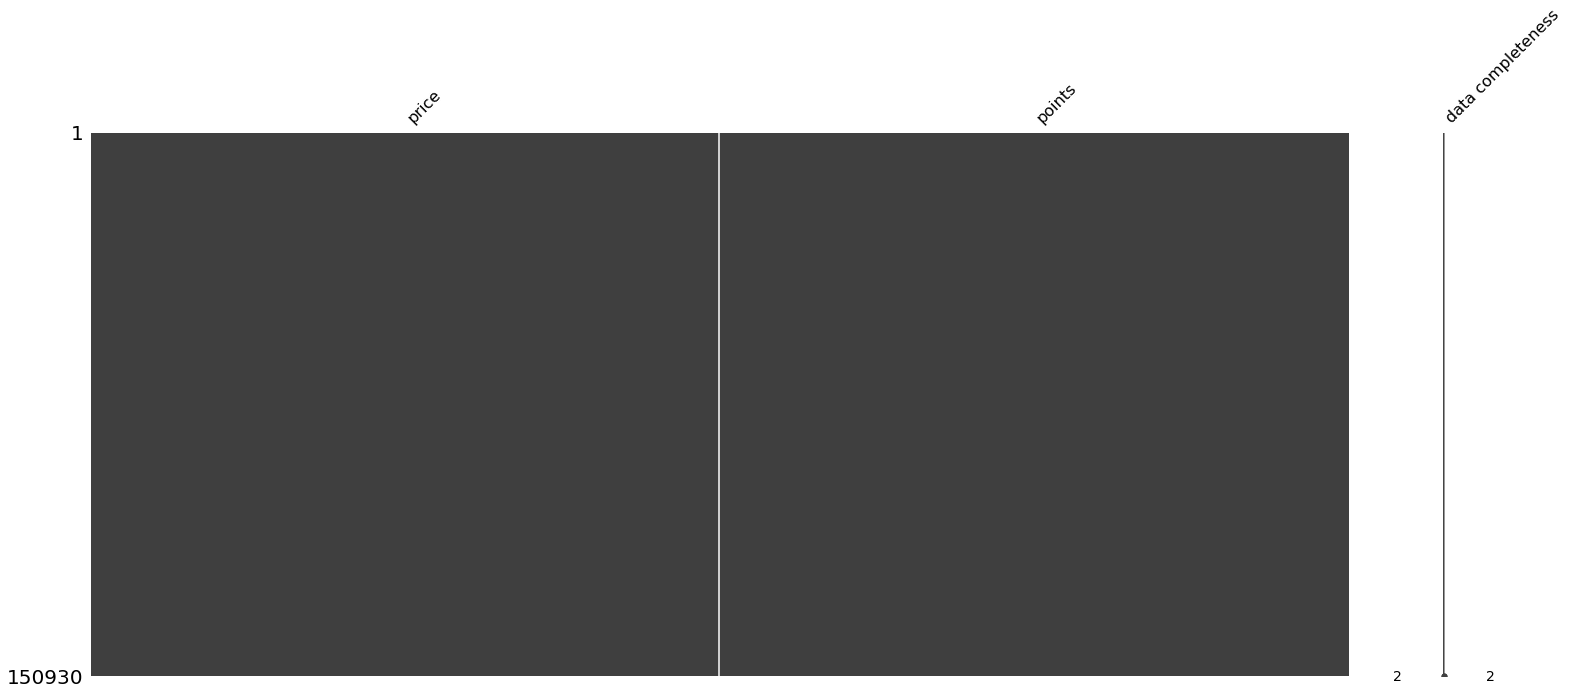

In [42]:
msno.matrix(data[['price','points']], labels=True)

## 第四种方法 使用对象之间相似性填补缺失值

处理前

In [43]:
data = pd.read_csv('winemag-data_first150k.csv',index_col='Unnamed: 0')
data['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

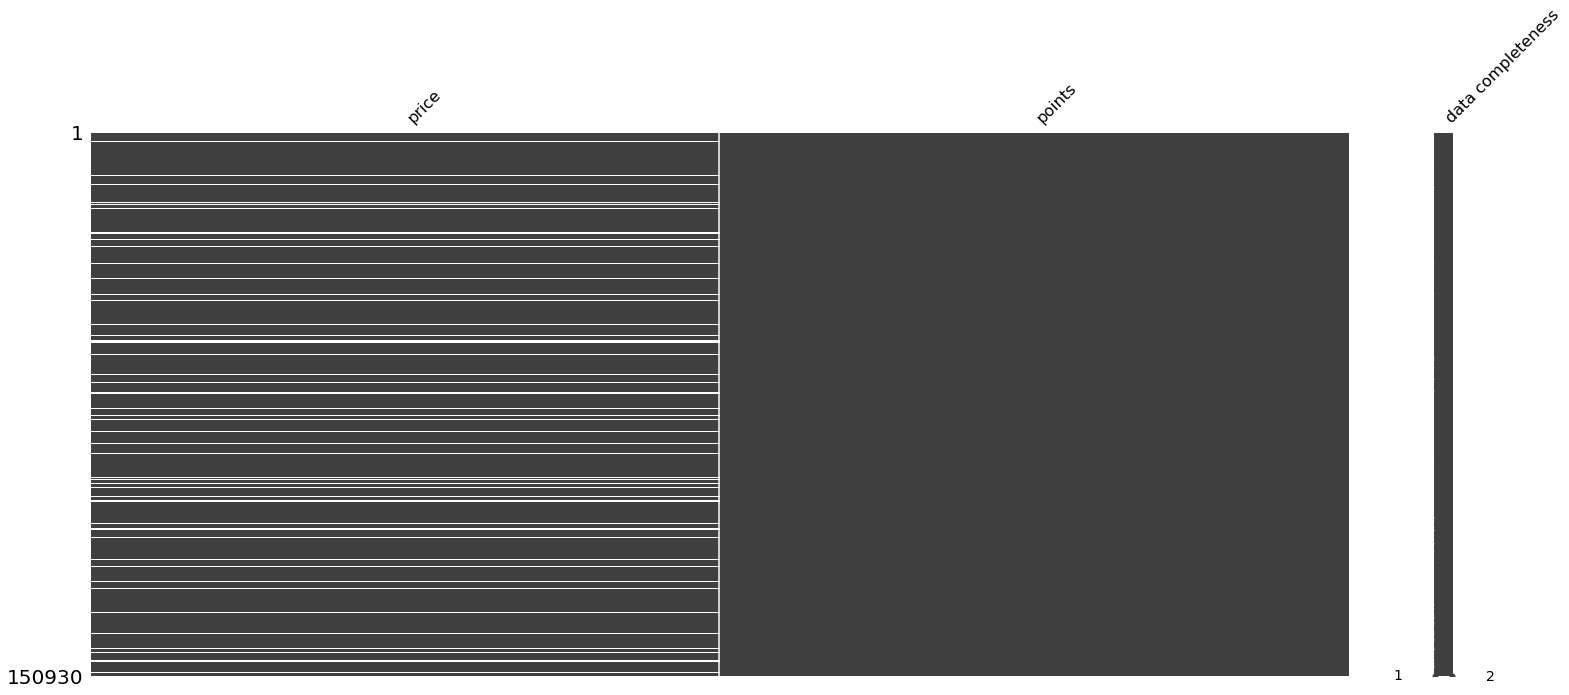

In [44]:
msno.matrix(data[['price','points']], labels=True)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
train = data[['price','points']].loc[data['price'].notnull()]
test = data[['price','points']].loc[data['price'].isnull()]

In [48]:
import numpy as np
trainx = np.array(train.points).reshape(-1,1)
testx = np.array(test.points).reshape(-1,1)
trainy = np.array(train.price).reshape(-1,1)

In [49]:
model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
data.loc[data['price'].isnull(),'price'] = model.predict(testx)

In [51]:
data['price'].describe()

count    150930.000000
mean         33.652543
std          35.000758
min          -7.246443
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

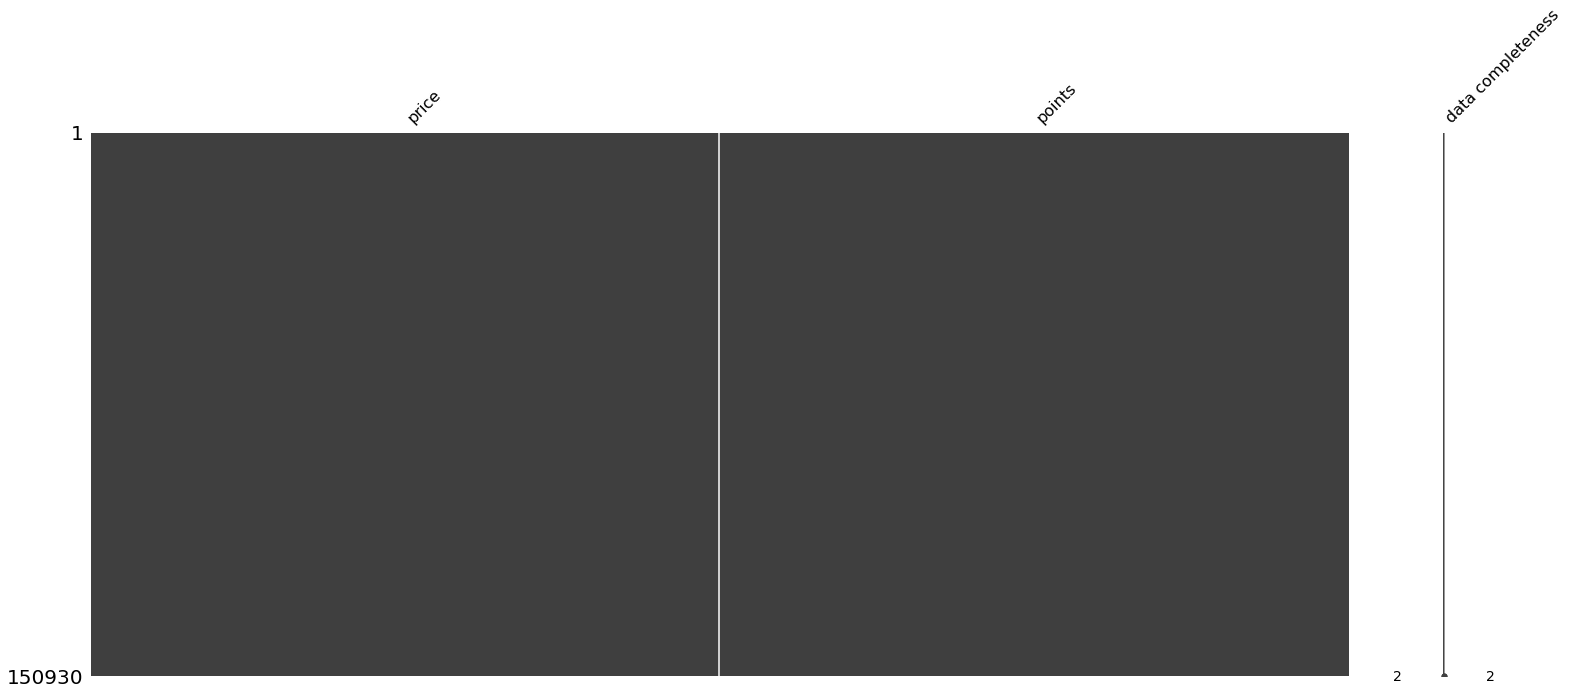

In [52]:
msno.matrix(data[['price','points']], labels=True)